In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print('✔')

✔


In [2]:
# 단일 레이어 구현 함수
def affine_layer_forward(X, W, b):
    y = np.dot(X, W) + b
    cache = (X, W, b)
    return y, cache

print('✔')

✔


In [3]:
# sigmoid 함수를 구현해 봅니다.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  

print('✔')

✔


In [4]:
# softmax함수를 구현해 봅니다.
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

print('✔')

✔


In [5]:
# 정답 라벨을 One-hot 인코딩하는 함수
def _change_one_hot_label(X, num_category):
    T = np.zeros((X.size, num_category))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T

print('✔')

✔


In [6]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

print('✔')

✔


In [7]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

print('✔')

✔


In [8]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    return W1, b1, W2, b2

print('✔')

✔


In [9]:
def affine_layer_backward(dy, cache):
    X, W, b = cache
    dX = np.dot(dy, W.T)
    dW = np.dot(X.T, dy)
    db = np.sum(dy, axis=0)
    return dX, dW, db

print('✔')

✔


In [10]:
# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

# 테스트를 위해 x_train_reshaped의 앞 5개의 데이터를 가져온다.
X = x_train_reshaped[:5]
print(X.shape)

11493376/11490434 [==============================] - 0s 0us/step
(5, 784)


In [11]:
weight_init_std = 0.1
input_size = 784
hidden_size=50
output_size = 10
Y_digit = y_train[:5]

# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_one_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)
        
dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트    
learning_rate = 0.1
print('계산해서 나온 더하거나 뺄 값')
print(dW2[0])
print('오차역전법 수행전')
print(W2[0])
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
print('오차역전법 수행후')
print(W2[0])

[[0.0991301  0.11281803 0.12614852 0.07409564 0.07036859 0.20545233
  0.0757873  0.06514806 0.04304046 0.12801097]
 [0.10558955 0.11001125 0.12355019 0.07197359 0.0666534  0.21853192
  0.08214981 0.05981194 0.04460351 0.11712484]
 [0.12357788 0.10714128 0.11568274 0.09434321 0.05823364 0.15874355
  0.09094992 0.05598416 0.05603949 0.13930412]
 [0.11229385 0.11177309 0.1275864  0.08352784 0.08711719 0.16004652
  0.07784795 0.06509401 0.04301289 0.13170028]
 [0.11071728 0.11310537 0.14797325 0.07670425 0.08471601 0.1463425
  0.08633279 0.05906571 0.04387991 0.13116294]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.1793257216163306
계산해서 나온 더하거나 뺄 값
[-0.09800502 -0.00385152  0.05946568  0.03565321 -0.00502945 -0.06710655
  0.0376183   0.02876609  0.02081848 -0.00832922]
오차역전법 수행전
[ 0.04536055 -0.12644239 -0.12008597 -0.11202337 -0.02498368 -0.01175178
 -0.120455

In [12]:
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    y_hat = softmax(a2)
    t = _change_one_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [13]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복 돌립니다.
for i in range(5):
    W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.06724147 0.0613363  0.13619846 0.19820448 0.06403229 0.12174081
  0.09516184 0.09158281 0.10965872 0.05484282]
 [0.06862619 0.06090159 0.17110485 0.21107473 0.05516034 0.09097122
  0.0942809  0.09408585 0.10457863 0.04921569]
 [0.07459204 0.06769868 0.14546388 0.17920416 0.05211409 0.12198972
  0.10560128 0.09311255 0.09704594 0.06317767]
 [0.06271959 0.06489262 0.14740119 0.19009103 0.06240134 0.11319753
  0.09879983 0.08265912 0.11918517 0.05865259]
 [0.06524674 0.07348419 0.1507942  0.17534686 0.05463736 0.10454401
  0.12525712 0.08126278 0.11211881 0.05730792]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.666719948787117
---------
[[0.08723388 0.07984368 0.11024451 0.14841145 0.08122305 0.15501093
  0.0846892  0.08361357 0.09567327 0.07405645]
 [0.09450066 0.08004636 0.14182722 0.16235623 0.07228128 0.11386055
  0.08585166 0.08770853 0.0935

In [14]:
def predict(W1, b1, W2, b2, X):
    a1 = np.dot(X, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

In [15]:
# X = x_train[:100] 에 대해 모델 추론을 시도합니다. 
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.13676814, 0.12605043, 0.05130959, 0.06171889, 0.12385373,
       0.22447629, 0.04645546, 0.0486174 , 0.05012643, 0.13062364])

In [16]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)

    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

In [17]:
acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_one_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.13676814 0.12605043 0.05130959 0.06171889 0.12385373 0.22447629
 0.04645546 0.0486174  0.05012643 0.13062364]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.06


In [18]:
def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):

    W1 = weight_init_std * np.random.randn(input_size, hidden_size)
    b1 = np.zeros(hidden_size)
    W2 = weight_init_std * np.random.randn(hidden_size, output_size)
    b2 = np.zeros(output_size)

    print(W1.shape)
    print(b1.shape)
    print(W2.shape)
    print(b2.shape)
    
    return W1, b1, W2, b2

In [19]:
# 하이퍼파라미터
iters_num = 50000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train_reshaped[batch_mask]
    y_batch = y_train[batch_mask]
    
    W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)

    # 학습 경과 기록
    train_loss_list.append(Loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        print('Loss: ', Loss)
        train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
        test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.3061738507723875
train acc, test acc | 0.09751666666666667, 0.0974
Loss:  0.8249320690392341
train acc, test acc | 0.7783833333333333, 0.7796
Loss:  0.539085510111661
train acc, test acc | 0.8752333333333333, 0.8786
Loss:  0.302568142132684
train acc, test acc | 0.8966833333333334, 0.9
Loss:  0.4635565919573188
train acc, test acc | 0.9080166666666667, 0.9097
Loss:  0.2928958985034441
train acc, test acc | 0.9141666666666667, 0.9152
Loss:  0.3246720702004458
train acc, test acc | 0.9199166666666667, 0.9206
Loss:  0.3512712272879332
train acc, test acc | 0.9229833333333334, 0.9249
Loss:  0.1855354368235529
train acc, test acc | 0.92795, 0.9289
Loss:  0.14290554228100683
train acc, test acc | 0.9309166666666666, 0.9311
Loss:  0.21261183959072416
train acc, test acc | 0.9340333333333334, 0.9336
Loss:  0.2276271174325152
train acc, test acc | 0.9378333333333333, 0.9376
Loss:  0.26725853533463156
train acc, test acc | 0.94005, 0.939
Loss:  0.136024030

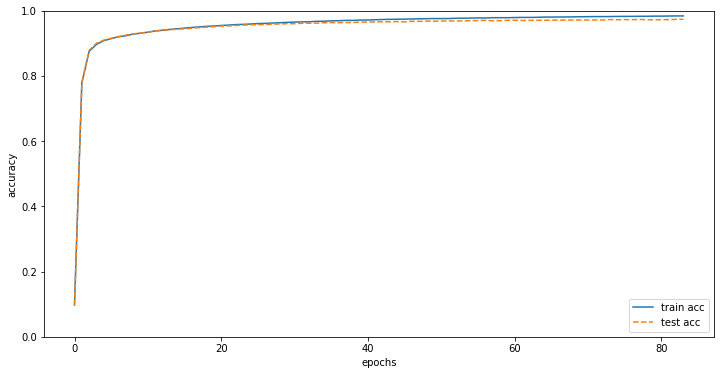

In [20]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 

# Accuracy 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

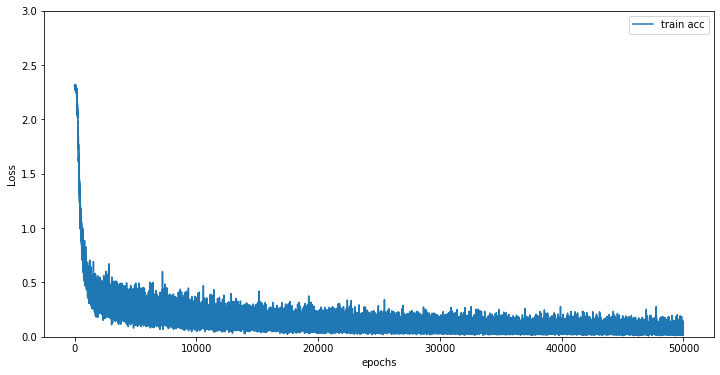

In [21]:
# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()